C:\Users\69654\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


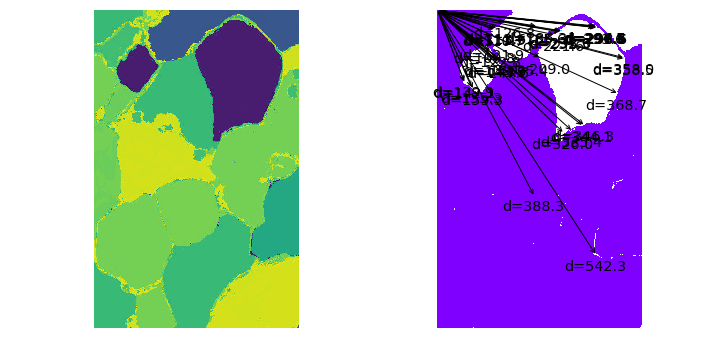

In [42]:
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

img = Image.open("C:/a/1.jpg")
img = np.array(img)
# generate some lowpass-filtered noise as a test image
#gen = np.random.RandomState(0)
#img = gen.poisson(2, size=(512, 512))
#img = ndimage.gaussian_filter(img.astype(np.double), (30, 30))
#img -= img.min()
#img /= img.max()

# use a boolean condition to find where pixel values are > 0.75
blobs = img > 100

# label connected regions that satisfy this condition
labels, nlabels = ndimage.label(blobs)

# find their centres of mass. in this case I'm weighting by the pixel values in
# `img`, but you could also pass the boolean values in `blobs` to compute the
# unweighted centroids.
r, c = np.vstack(ndimage.center_of_mass(img, labels, np.arange(nlabels) + 1)).T

# find their distances from the top-left corner
d = np.sqrt(r*r + c*c)

# plot
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].imshow(img)
ax[1].hold(True)
ax[1].imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.rainbow)
for ri, ci, di in zip(r, c, d):
    ax[1].annotate('', xy=(0, 0), xytext=(ci, ri),
                   arrowprops={'arrowstyle':'<-', 'shrinkA':0})
    ax[1].annotate('d=%.1f' % di, xy=(ci, ri),  xytext=(0, -5),
                   textcoords='offset points', ha='center', va='top',
                   fontsize='x-large')
for aa in ax.flat:
    aa.set_axis_off()
fig.tight_layout()
plt.show()

In [35]:
d

array([  51.00270031,   53.        ,   55.        ,  186.54303775,
         54.00925847,   53.45312673,  185.18778106,   55.08175742,
        184.06792225,  187.06683298,  186.09674903,   53.46026562,
        187.13097018,   55.22553512,  184.24516875,  186.19396389,
        185.75481382,   56.5154846 ,   60.66551072,   65.        ,
        179.24360003,  181.66412693,  184.69434209,   63.3245608 ,
        183.78792126,   62.64183905,   65.520989  ,   61.98386887,
         64.62173223,  177.07696067,   63.2455532 ,  183.09560344,
         64.51356447,  180.28738333,   66.21631959,  179.54456271,
        181.52754612,   67.41661516,   68.78786961,  179.19304858,
        180.73737854,   73.73601562,  181.86808406,  181.02486017,
        178.294228  ,  180.18878988,  183.22318969,  181.33394608,
        180.51038751,  182.48287591,   71.11258679,   75.84449337,
        178.79543167,  181.66452598,   72.89718787,   74.6860094 ,
         78.29431652,  180.58429243,   74.24284477,   77.81078

In [19]:
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from PIL import Image

img =Image.open("C:/a/1.jpg")
#flatImg = np.array(img).reshape(-1,3)
# generate some lowpass-filtered noise as a test image
#gen = np.random.RandomState(0)
#img = gen.poisson(2, size=(512, 512))
#img = ndimage.gaussian_filter(img.astype(np.double), (30, 30))
#img -= img.min()
#img /= img.max()

# use a boolean condition to find where pixel values are > 0.75
blobs = img == [85,226,254]
labels, nlabels = ndimage.label(blobs)

In [21]:
print (labels)

0


In [14]:
from skimage.measure import regionprops

properties = regionprops(labels)
#print 'Label \tLargest side'
for p in properties:
    min_row, min_col, max_row, max_col = p.bbox
    #print '%5d %14.3f' % (p.label, max(max_row - min_row, max_col - min_col))

fig = plt.figure()
ax = fig.add_subplot(111)    
ax.imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.gist_rainbow) 
ax.set_title('Labeled objects')
plt.xticks([])
plt.yticks([])
for ri, ci, li in zip(r, c, range(1, nlabels+1)):
    ax.annotate(li, xy=(ci, ri), fontsize=24)
plt.show()

TypeError: Only 2-D and 3-D images supported.